In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Mengimport Dataset
df = pd.read_csv(r'D:\Documents\Heart Disease Dataset\heart_uci.csv')

In [5]:
# Menampilkan 5 baris pertama dari dataset
print("5 Baris Pertama:")
df.head()

5 Baris Pertama:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
# Menampilkan 5 baris terakhir dari dataset
print("5 Baris Terakhir:")
df.tail()

5 Baris Terakhir:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [7]:
# Lihat informasi tentang dataset
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
# Cek nilai missing values
print("Nilai Missing:")
df.isnull().sum()


Nilai Missing:


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [9]:
# Mengecek nilai Outliers dengan IQR pada kolom numerik
numeric_df = df.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
outliers_count = outliers.sum()

print("\nJumlah Outliers pada setiap kolom numerik:")
print(outliers_count)


Jumlah Outliers pada setiap kolom numerik:
id            0
age           0
trestbps     28
chol        183
thalch        2
oldpeak      16
ca           20
num           0
dtype: int64


In [16]:
# Statistik Deskriptif untuk Kolom Numerik
print("Mean untuk setiap kolom numerik:")
mean = numeric_df.mean()
print(mean)

print("Median untuk setiap kolom numerik:")
median = numeric_df.median()
print(median)

print("Mode untuk setiap kolom numerik:")
mode = numeric_df.mode().iloc[0]  
print(mode)

print("Standar Deviasi untuk setiap kolom numerik:")
std_dev = numeric_df.std()
print(std_dev)

print("Variansi untuk setiap kolom numerik:")
variance = numeric_df.var()
print(variance)

print("Skewness untuk setiap kolom numerik:")
skewness = numeric_df.skew()
print(skewness)

print("Kurtosis untuk setiap kolom numerik:")
kurtosis = numeric_df.kurtosis()
print(kurtosis)


Mean untuk setiap kolom numerik:
id          460.500000
age          53.510870
trestbps    132.132404
chol        199.130337
thalch      137.545665
oldpeak       0.878788
ca            0.676375
num           0.995652
dtype: float64
Median untuk setiap kolom numerik:
id          460.5
age          54.0
trestbps    130.0
chol        223.0
thalch      140.0
oldpeak       0.5
ca            0.0
num           1.0
dtype: float64
Mode untuk setiap kolom numerik:
id            1.0
age          54.0
trestbps    120.0
chol          0.0
thalch      150.0
oldpeak       0.0
ca            0.0
num           0.0
Name: 0, dtype: float64
Standar Deviasi untuk setiap kolom numerik:
id          265.725422
age           9.424685
trestbps     19.066070
chol        110.780810
thalch       25.926276
oldpeak       1.091226
ca            0.935653
num           1.142693
dtype: float64
Variansi untuk setiap kolom numerik:
id          70610.000000
age            88.824691
trestbps      363.515007
chol        12272.

In [11]:
# Korelasi antar Variabel Numerik
print("Matriks Korelasi antar Variabel Numerik:")

correlation_matrix = numeric_df.corr()
correlation_matrix

Matriks Korelasi antar Variabel Numerik:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.239301,0.052924,-0.376936,-0.466427,0.049930,0.061433,0.273552
age,0.239301,1.000000,0.244253,-0.086234,-0.365778,0.258243,0.370416,0.339596
trestbps,0.052924,0.244253,1.000000,0.092853,-0.104899,0.161908,0.093705,0.122291
chol,-0.376936,-0.086234,0.092853,1.000000,0.236121,0.047734,0.051606,-0.231547
thalch,-0.466427,-0.365778,-0.104899,0.236121,1.000000,-0.151174,-0.264094,-0.366265
oldpeak,0.049930,0.258243,0.161908,0.047734,-0.151174,1.000000,0.281817,0.443084
ca,0.061433,0.370416,0.093705,0.051606,-0.264094,0.281817,1.000000,0.516216
num,0.273552,0.339596,0.122291,-0.231547,-0.366265,0.443084,0.516216,1.000000


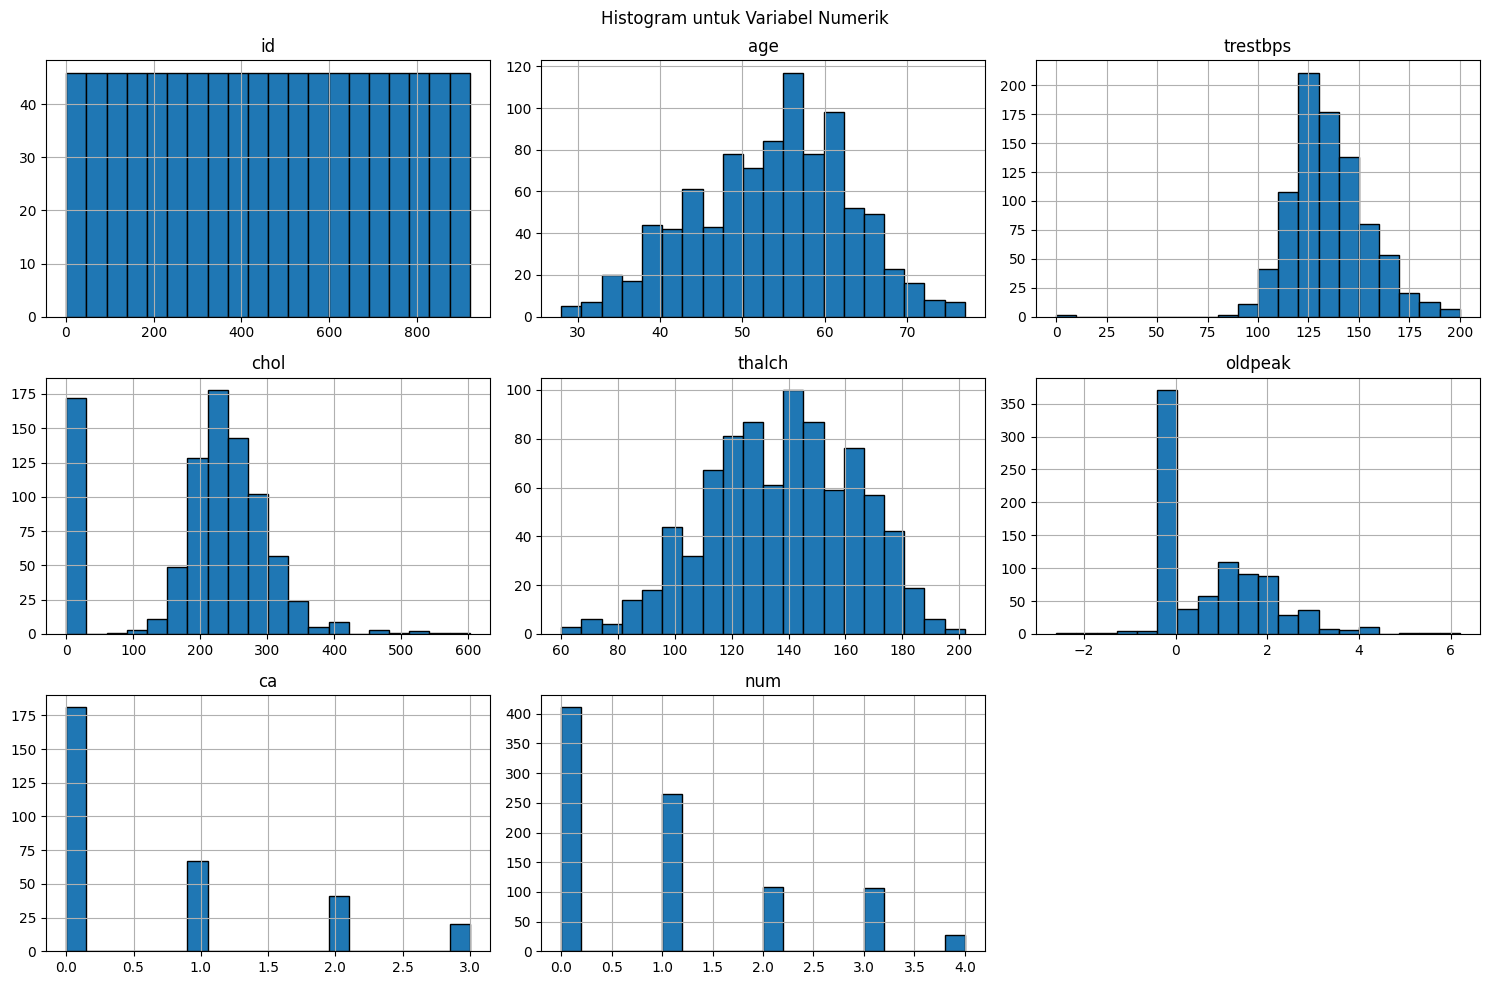

In [12]:
# Histogram untuk setiap variabel numerik
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histogram untuk Variabel Numerik')
plt.tight_layout()
plt.show()


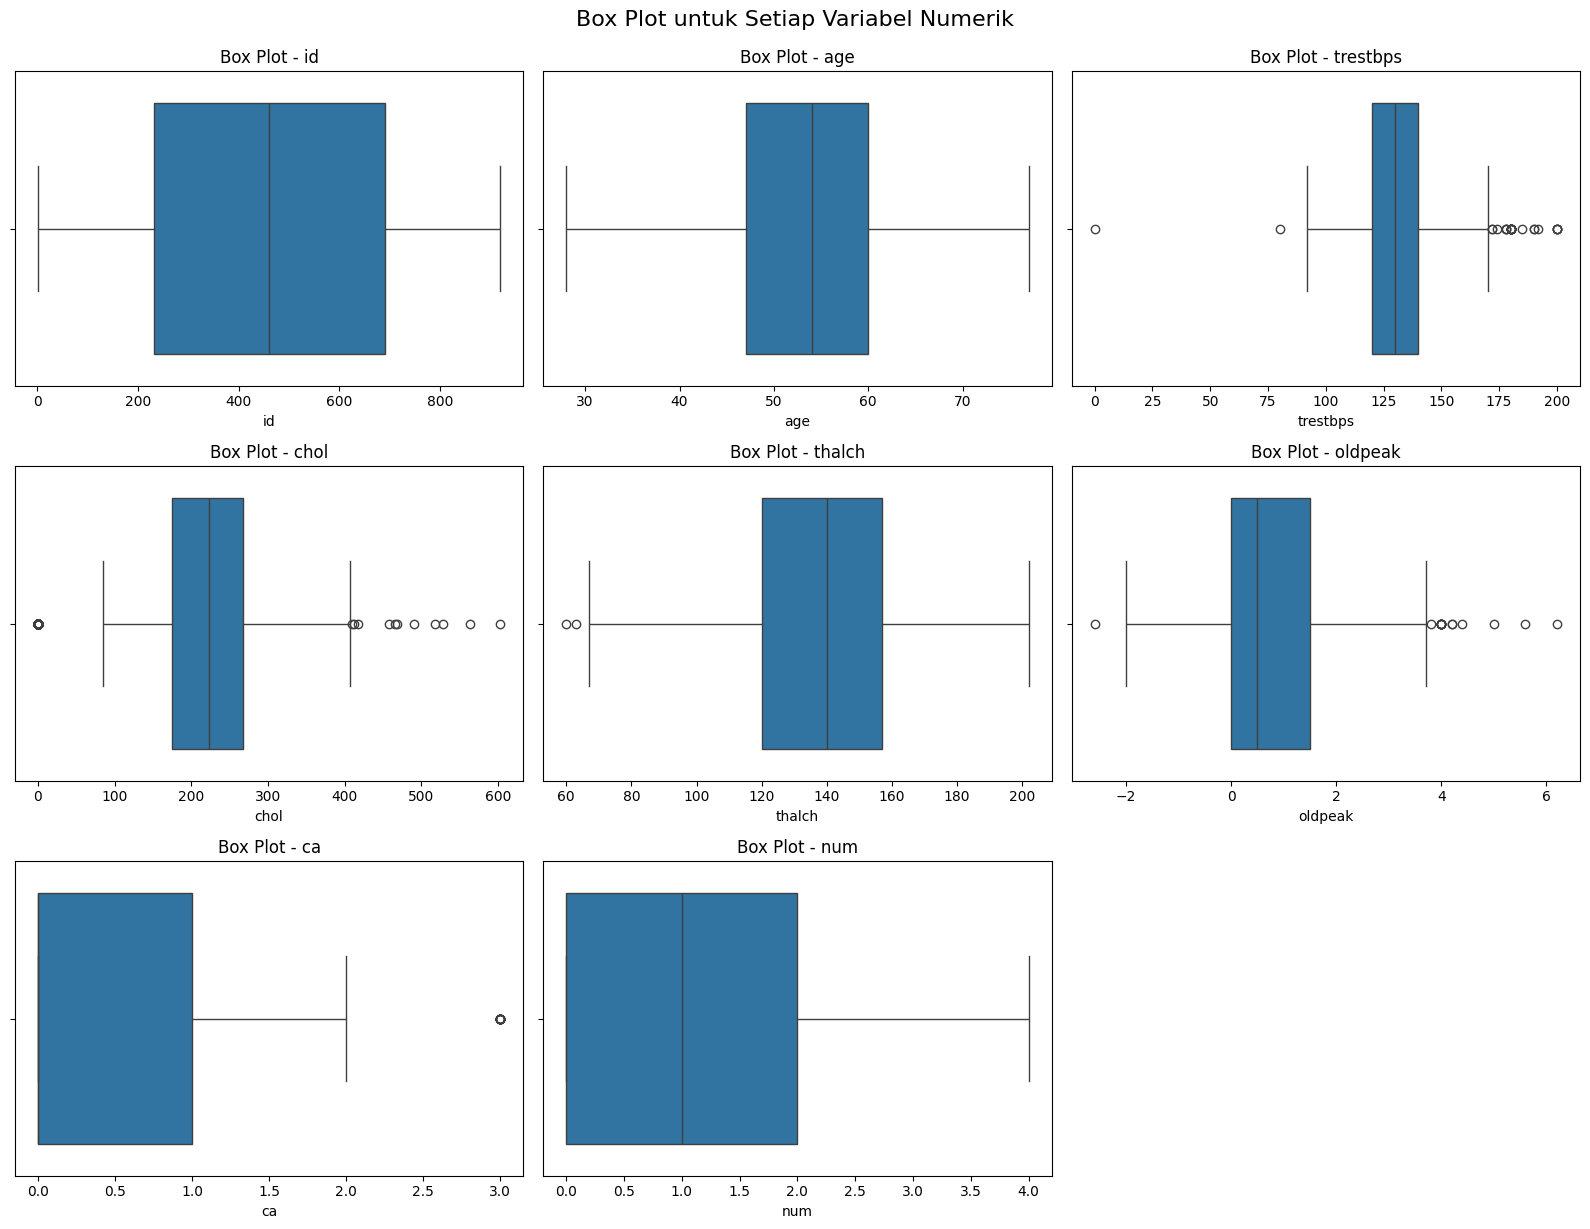

In [13]:
# Box Plot untuk setiap variabel numerik
plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(len(numeric_df.columns) // 3 + 1, 3, i)
    sns.boxplot(data=numeric_df, x=column)
    plt.title(f'Box Plot - {column}')
plt.tight_layout()
plt.suptitle('Box Plot untuk Setiap Variabel Numerik', y=1.02, fontsize=16)
plt.show()

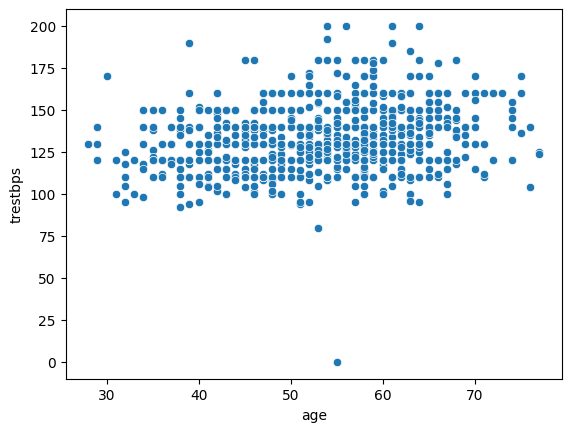

In [14]:
# Scatter plot untuk pasangan variabel dengan korelasi tinggi
sns.scatterplot(x='age', y='trestbps', data=df)
plt.show()

# LAPORAN SINGKAT HASIL EXSPLORASI DAN ANALISIS DATA.

Missing Values: Beberapa kolom memiliki nilai yang hilang, terutama pada variabel numerik seperti ca, thalch, dan chol.

Korelasi: Korelasi kuat antara age dan trestbps (positif) serta oldpeak dan num (negatif).

Scatter Plot: Scatter plot antara variabel dengan korelasi tinggi, seperti age dan trestbps, menunjukkan hubungan linear positif, yang mendukung hasil korelasi numerik. Ini berarti, seiring bertambahnya usia, tekanan darah istirahat cenderung meningkat.

Distribusi Tidak Normal: Beberapa variabel skewed, perlu transformasi.

Korelasi Kuat: Korelasi signifikan antara usia dan tekanan darah, serta ST depression dan keparahan penyakit jantung.

Handling Missing Values: Perlu imputasi untuk nilai yang hilang.